<a href="https://colab.research.google.com/github/Witcape/PSO/blob/main/Final_LLM_Quasi_Initialisation_with_LLM_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [5]:
# !pip install accelerate
# import accelerate

In [6]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.3 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-70.1.1-py3-none-any.whl (883 kB)
    Using cached scikit_build-0.18.0-py3-none-any.whl (85 kB)
    Using cached cmake-3.29.6-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
    Using cached ninja-1.11.1.1-py2.py3-none-manylinux1_x86_64.manylinux_2_5_x86_64.whl (307 kB)
    Using cached distro-1.9.0-py3-none-any.whl (20 kB)
    Using cached packaging-24.1-py3-none-any.whl (53 kB)
    Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Creating /tmp/pip-build-env-5s7bk8op/overlay/local/bin
    changing mode of /tmp/pip-build-env-5s7bk8op/overlay/local/bin/ninja to 755
    changing mode of

In [7]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [8]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt

In [9]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [10]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [11]:
lcpp_llm.params.n_gpu_layers

32

### Generating Population with Quasi Initialisation

In [12]:
method =' Quasi-Random Sequence'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [13]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [14]:
print(response)

{'id': 'cmpl-be95a58c-b51f-4c32-9d1b-eae5f8bb8476', 'object': 'text_completion', 'created': 1719748822, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using  Quasi-Random Sequence, only 2 decimal places, \n\nASSISTANT:\n\nHere is a list of 20 quasi-random numbers between -10 and 10 with two decimal places:\n\n1. -8.47\n2. -5.93\n3. -3.69\n4. -2.25\n5. -1.08\n6. 0.87\n7. 1.78\n8. 2.69\n9. 3.59\n10. 4.47\n11. 5.38\n12. 6.27\n13. 7.15\n14. 8.02\n15. 8.90\n16. 9.77\n17. 10.64\n18. 11.50\n19. 12.35\n20. 13.20\n\nPlease note that these numbers are generated using a Quasi-Random Sequence, which means they may not be perfectly uniform or random, but should still provide a good representation of the range -10 to 10 with 

In [15]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.47, -5.93, -3.69, -2.25, -1.08, 0.87, 1.78, 2.69, 3.59, 4.47, 5.38, 6.27, 7.15, 8.02, 8.9, 9.77, 10.64, 11.5, 12.35, 13.2]


### PSO Parameters

In [28]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

In [29]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [30]:
def sphere(x):
    return sum(x**2)

In [31]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [32]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
if(nPop > 20):
  numbers = numbers[:19]
print(nPop)

20


In [33]:
w = 1  # Inertia Weight
wdamp = 0.99  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [34]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [35]:
particles = []

for _ in range(nPop):
    position = np.random.uniform(VarMin, VarMax, VarSize)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [36]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Running PSO

In [37]:
w_values = []
g_values = []

for it in range(MaxIt):
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

            # Update Global Best
            if p['Best']['Cost'] < GlobalBest['Cost']:  # tell best cost using roullete wheel. LLM will check for global best
                GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']} # tell best cost using roullete wheel

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    prompt = f"generate one positive number that is smaller than {w}. Don't write anything else, just that number"
    w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                          repeat_penalty=1.2, top_k=150,
                          echo=True)

    g_values.append(GlobalBest['Cost'])
    BestCost[it] = GlobalBest['Cost']

    text_response = w_response['choices'][0]['text']
    value = re.findall(r'-?\d+\.\d+', text_response)
    value = [float(num) for num in value]

    value = value[np.size(value) - 1]
    print(f'w{it+1} = {value}')
    w_values.append(w)
    w = value

w_values.append(w)
print(w_values)

Iteration 1: Best Cost = 120.9538322481075


Llama.generate: prefix-match hit


w1 = 0.5
Iteration 2: Best Cost = 46.150884124058855


Llama.generate: prefix-match hit


w2 = 0.2
Iteration 3: Best Cost = 11.50005287932417


Llama.generate: prefix-match hit


w3 = 0.19
Iteration 4: Best Cost = 3.6015956326398406


Llama.generate: prefix-match hit


w4 = 0.18
Iteration 5: Best Cost = 1.905976254076842


Llama.generate: prefix-match hit


w5 = 0.17
Iteration 6: Best Cost = 1.7722573932726973


Llama.generate: prefix-match hit


w6 = 0.169
Iteration 7: Best Cost = 0.955204605002755


Llama.generate: prefix-match hit


w7 = 0.123
Iteration 8: Best Cost = 0.5989785610411548


Llama.generate: prefix-match hit


w8 = 0.098
Iteration 9: Best Cost = 0.5108958952797529


Llama.generate: prefix-match hit


w9 = 0.034
Iteration 10: Best Cost = 0.49570007533414584


Llama.generate: prefix-match hit


w10 = 0.029
Iteration 11: Best Cost = 0.3987099899174234


Llama.generate: prefix-match hit


w11 = 0.028
Iteration 12: Best Cost = 0.3576026184955624


Llama.generate: prefix-match hit


w12 = 0.019
Iteration 13: Best Cost = 0.26069977008954687


Llama.generate: prefix-match hit


w13 = 0.018
Iteration 14: Best Cost = 0.17738925658320012


Llama.generate: prefix-match hit


w14 = 0.017
Iteration 15: Best Cost = 0.06860670278707115


Llama.generate: prefix-match hit


w15 = 0.0169
Iteration 16: Best Cost = 0.05016171240909652


Llama.generate: prefix-match hit


w16 = 0.0158
Iteration 17: Best Cost = 0.0228948017400037


Llama.generate: prefix-match hit


w17 = 0.0094
Iteration 18: Best Cost = 0.00627723580390362


Llama.generate: prefix-match hit


w18 = 0.0087
Iteration 19: Best Cost = 0.005216501565595217


Llama.generate: prefix-match hit


w19 = 0.0069
Iteration 20: Best Cost = 0.004691587743534801


Llama.generate: prefix-match hit


w20 = 0.0045
[1, 0.5, 0.2, 0.19, 0.18, 0.17, 0.169, 0.123, 0.098, 0.034, 0.029, 0.028, 0.019, 0.018, 0.017, 0.0169, 0.0158, 0.0094, 0.0087, 0.0069, 0.0045]


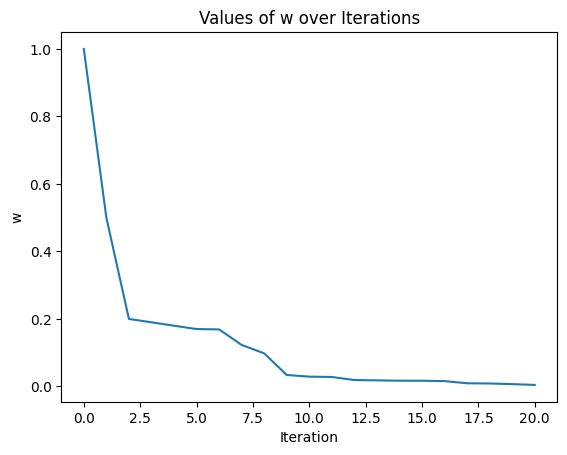

In [38]:
plt.plot(w_values)
plt.xlabel("Iteration")
plt.ylabel("w")
plt.title("Values of w over Iterations")
plt.show()

[120.9538322481075, 46.150884124058855, 11.50005287932417, 3.6015956326398406, 1.905976254076842, 1.7722573932726973, 0.955204605002755, 0.5989785610411548, 0.5108958952797529, 0.49570007533414584, 0.3987099899174234, 0.3576026184955624, 0.26069977008954687, 0.17738925658320012, 0.06860670278707115, 0.05016171240909652, 0.0228948017400037, 0.00627723580390362, 0.005216501565595217, 0.004691587743534801]


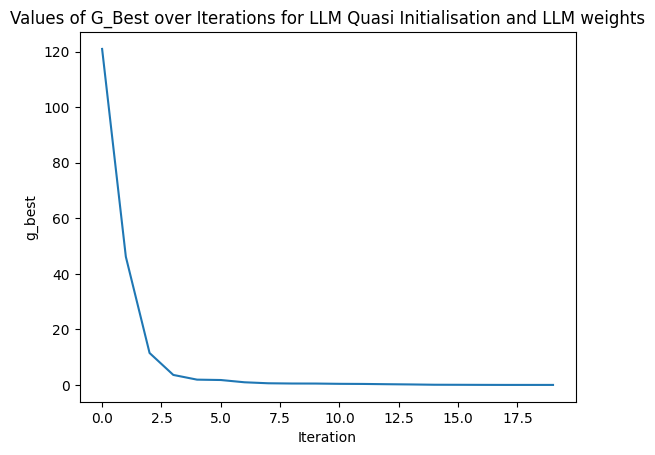

In [40]:
G_values_Quasi_weights = g_values
print(G_values_Quasi_weights)

plt.plot(G_values_Quasi_weights)
plt.xlabel("Iteration")
plt.ylabel("g_best")
plt.title("Values of G_Best over Iterations for LLM Quasi Initialisation and LLM weights")
plt.show()